# Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. What was the average age in male and female athletes?

In [37]:
athletes_df = pd.read_csv("athletes.csv")

In [38]:
athletes_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [39]:
athletes_df.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [48]:
from datetime import datetime
athletes_df['dob'] = pd.to_datetime(athletes_df['dob'])
olympic_start = datetime.strptime('08/05/16','%m/%d/%y')
athletes_df['age'] = (olympic_start - athletes_df['dob']).astype('timedelta64[Y]') 
athletes_df.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25.0


In [49]:
athletes_df.groupby('sex')['age'].mean()

sex
female    25.536407
male      26.159507
Name: age, dtype: float64

## 2. What are the most common Dates of Birth?

In [50]:
athletes_df.groupby('dob')['id'].count().sort_values(ascending=False).head()

dob
1988-03-05    9
1990-12-20    9
1993-02-18    9
1989-12-14    8
1988-04-29    8
Name: id, dtype: int64

## 3. How about the most common birthdays?

In [71]:
athletes_df['month'] = athletes_df['dob'].dt.month
athletes_df['day'] = athletes_df['dob'].dt.day
athletes_df['month_day'] = athletes_df.apply(lambda row: str(row['month']) + '/' + str(row['day']), axis=1)
# question here, how do i remove the decimal point from the month/day?

In [66]:
athletes_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,month,day,month_day
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46.0,10.0,17.0,10.0/17.0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29.0,9.0,23.0,9.0/23.0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24.0,5.0,27.0,5.0/27.0
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25.0,1.0,2.0,1.0/2.0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25.0,11.0,26.0,11.0/26.0


In [86]:
athletes_df.groupby('month_day')['month_day'].agg('count').sort_values(ascending=False).head()

month_day
1.0/1.0     58
2.0/5.0     51
2.0/10.0    48
9.0/19.0    47
1.0/10.0    47
Name: month_day, dtype: int64

## 4. What are the Countries with more than 100 medals?

In [179]:
#groupby countries and then sum the medals in each column
athletes_df['total_medals'] = athletes_df['gold'] + athletes_df['silver'] + athletes_df['bronze']
total_df = pd.DataFrame(athletes_df.groupby('nationality')[['nationality','total_medals']].agg(sum).sort_values(by='total_medals',ascending=False)).reset_index()
total_df.head()

,nationality,total_medals
0,USA,264
1,GER,160
2,GBR,145
3,RUS,115
4,CHN,113


In [181]:
total_df_100 = total_df[total_df['total_medals'] > 100]
total_df_100

,nationality,total_medals
0,USA,264
1,GER,160
2,GBR,145
3,RUS,115
4,CHN,113


## 5. Create a bar chart for the results of the previous exercise.

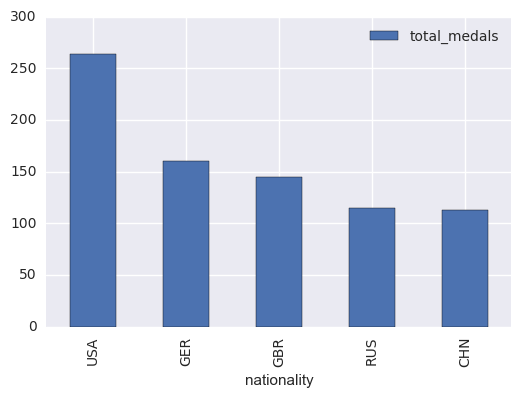

In [182]:
%matplotlib inline
total_df_100.plot.bar(x='nationality',y='total_medals')

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

In [142]:
male_weightlift = athletes_df[(athletes_df['sex'] == 'male') & (athletes_df['sport'] == 'weightlifting')]
male_weightlift

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,month,day,month_day,total_medals
120,242818896,Adrian Edward Zielinski,POL,male,1989-03-28,1.70,94.0,weightlifting,0,0,0,27.0,3.0,28.0,3.0/28.0,0
186,162169475,Ahmed Mohamed,EGY,male,1988-04-27,1.85,144.0,weightlifting,0,0,0,28.0,4.0,27.0,4.0/27.0,0
189,101574216,Ahmed Saad,EGY,male,1986-11-01,1.60,62.0,weightlifting,0,0,0,29.0,11.0,1.0,11.0/1.0,0
403,745034260,Alexandr Spac,MDA,male,1989-11-21,1.64,77.0,weightlifting,0,0,0,26.0,11.0,21.0,11.0/21.0,0
405,928138606,Alexandr Zaichikov,KAZ,male,1992-08-17,1.80,105.0,weightlifting,0,0,1,23.0,8.0,17.0,8.0/17.0,1
437,434694198,Alexej Prochorow,GER,male,1990-03-30,1.91,138.0,weightlifting,0,0,0,26.0,3.0,30.0,3.0/30.0,0
461,800154411,Ali Hashemi,IRI,male,1991-11-01,1.78,93.0,weightlifting,0,0,0,24.0,11.0,1.0,11.0/1.0,0
476,502227727,Aliaksandr Bersanau,BLR,male,1992-09-01,1.76,94.0,weightlifting,0,0,0,23.0,9.0,1.0,9.0/1.0,0
481,185532375,Aliaksei Mzhachyk,BLR,male,1996-06-30,1.90,136.0,weightlifting,0,0,0,20.0,6.0,30.0,6.0/30.0,0
546,949130459,Almir Velagic,GER,male,1981-08-22,1.83,149.0,weightlifting,0,0,0,34.0,8.0,22.0,8.0/22.0,0


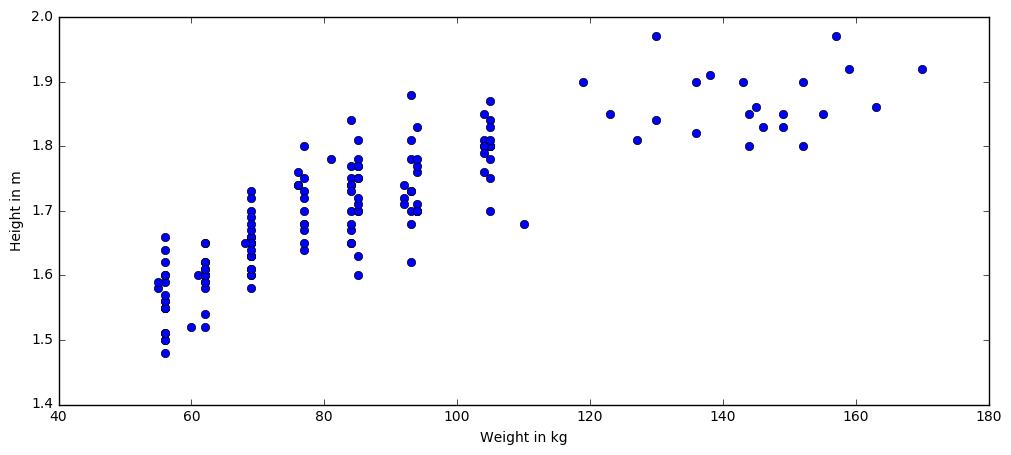

In [150]:
fig = plt.figure(figsize=(12,5))
plt.plot(male_weightlift['weight'], male_weightlift['height'], 'o')
plt.xlabel('Weight in kg')
plt.ylabel('Height in m')

In [151]:
# in referene to above, looks like we have 1) ~55kg 2) ~65kg 3) ~70kg 4) ~80kg 5) ~85kg 6) ~95kg 7) ~105kg 8) >105kg  

## 7. Generate a histogram of male and female height distribution among all participants.

In [158]:
male = athletes_df[athletes_df['sex'] == 'male'].dropna()
female = athletes_df[athletes_df['sex'] == 'female'].dropna()

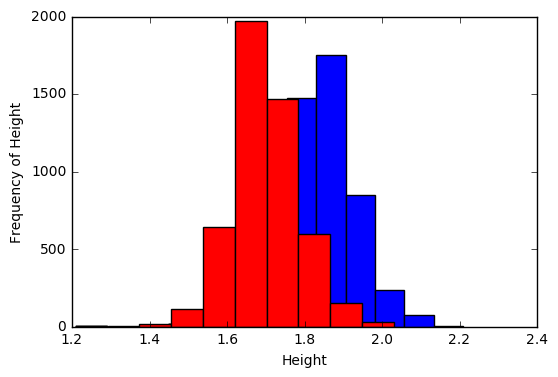

In [164]:
plt.hist(male['height'], color='blue')
plt.hist(female['height'], color='red')
plt.xlabel('Height')
plt.ylabel('Frequency of Height')

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

In [165]:
import seaborn as sns

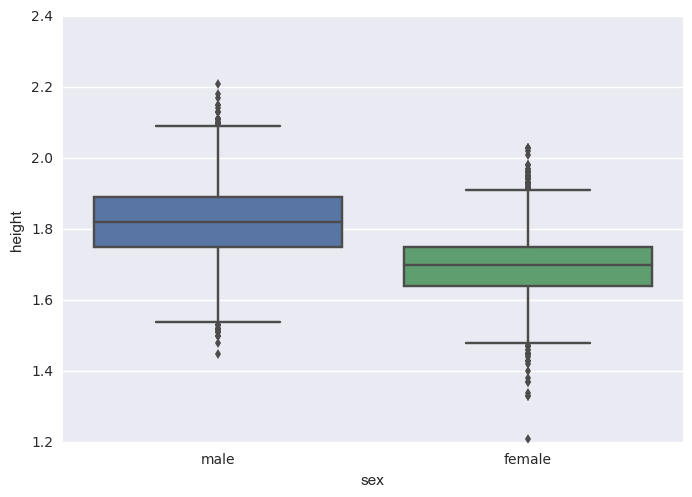

In [166]:
sns.boxplot(x='sex', y='height', data=athletes_df)

## 9. Create a world map for countries and their respective amount of medals in Carto. [Carto](http://carto.com) provides a quick and easy way to create maps. For this you will also need to use 'countries.csv'.

In [167]:
countries_df = pd.read_csv('countries.csv')

In [170]:
countries_df.head()

,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [184]:
countries_df.columns = ['country', 'nationality']

In [188]:
total_df_carto = total_df.merge(countries_df, how='left', on='nationality')
total_df_carto

,nationality,total_medals,country
0,USA,264,United States
1,GER,160,Germany
2,GBR,145,United Kingdom
3,RUS,115,Russia
4,CHN,113,China
5,FRA,95,France
6,AUS,82,Australia
7,ITA,72,Italy
8,CAN,69,Canada
9,JPN,65,Japan


## 10. _Optional_: What else would you try?

In [217]:
#which sports generated the most medals per country
remove_zeromedals_df = athletes_df[athletes_df['total_medals'] > 0]
df_new = remove_zeromedals_df.groupby(['sport','nationality']).agg(sum).sort_values(by='total_medals',ascending=False)

In [219]:
df_new.head(10)

id  height  weight  gold  silver  bronze  \
sport     nationality                                                      
aquatics  USA          30989697760   99.97  4232.0    61      18      10   
athletics USA          22621220246   69.43  2804.0    27      10       9   
football  GER          13887859571   64.00  2554.0    18      18       0   
aquatics  AUS          12432948491   41.85  1652.0     7      14      13   
hockey    GER          17764932105   58.39  2360.0     0       0      33   
aquatics  ITA          14360795417   55.95  2449.0     1      16      16   
          CHN          13186533131   42.63  1512.0    11      15       5   
handball  FRA          12817243539   54.95  2453.0     0      30       0   
athletics JAM          10756703219   38.59  1538.0    11      17       2   
aquatics  RUS          12827864005   41.90  1556.0    11       2      15   

                          age  month    day  total_medals  
sport     nationality                                      
aquatics  USA          1283.0  343.0  822.0            89  
athletics USA          1049.0  259.0  679.0            46  
football  GER           870.0  213.0  512.0            36  
aquatics  AUS           516.0  116.0  386.0            34  
hockey    GER           810.0  247.0  506.0            33  
aquatics  ITA           835.0  219.0  483.0            33  
          CHN           565.0  169.0  402.0            31  
handball  FRA           825.0  216.0  381.0            30  
athletics JAM           616.0  176.0  432.0            30  
aquatics  RUS           605.0  154.0  456.0            28